In [2]:
import json
import pandas as pd
import matplotlib.pyplot as plt

# Assumindo que você tem um arquivo JSON chamado 'data.json'
# Se tiver múltiplos arquivos, você pode adaptá-los em uma lista

# 1. Carregar o JSON e transformar em DataFrame
with open('XGBoost - busca_hiperparametros_.json', 'r') as file:
    data = json.load(file)

# Extrair os scores do dicionário
df = pd.DataFrame({
    'mean_train_score': data['XGBoost']['mean_train_score'],
    'mean_test_score': data['XGBoost']['mean_test_score'],
    'std_train_score': data['XGBoost']['std_train_score'],
    'std_test_score': data['XGBoost']['std_test_score']
})


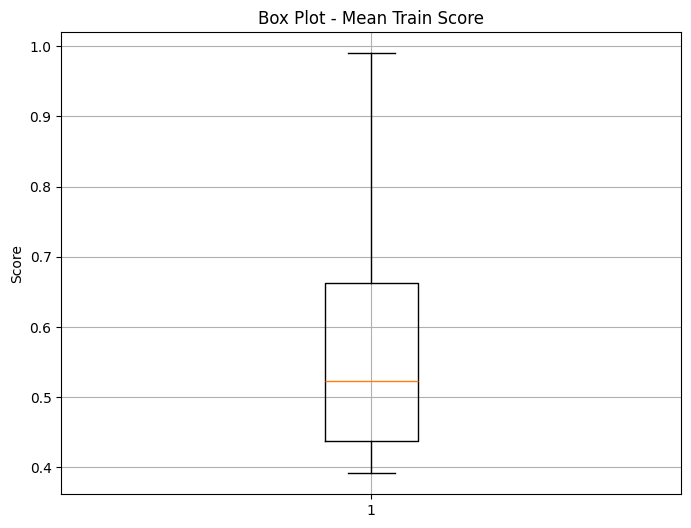

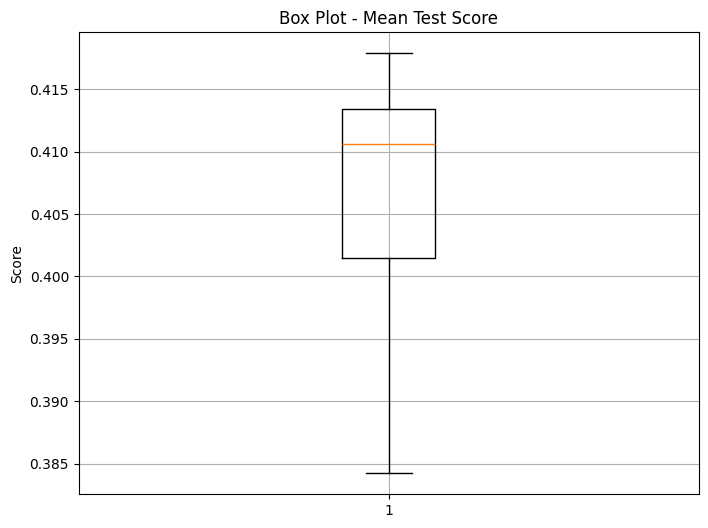

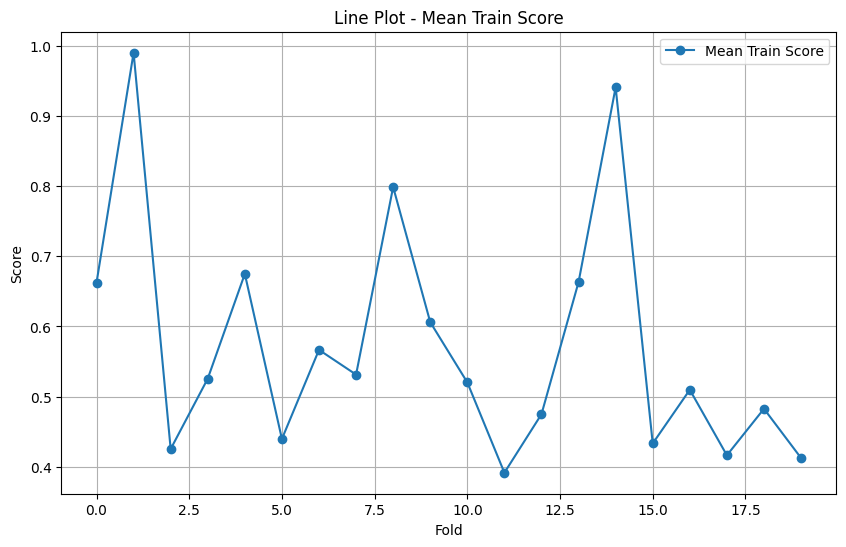

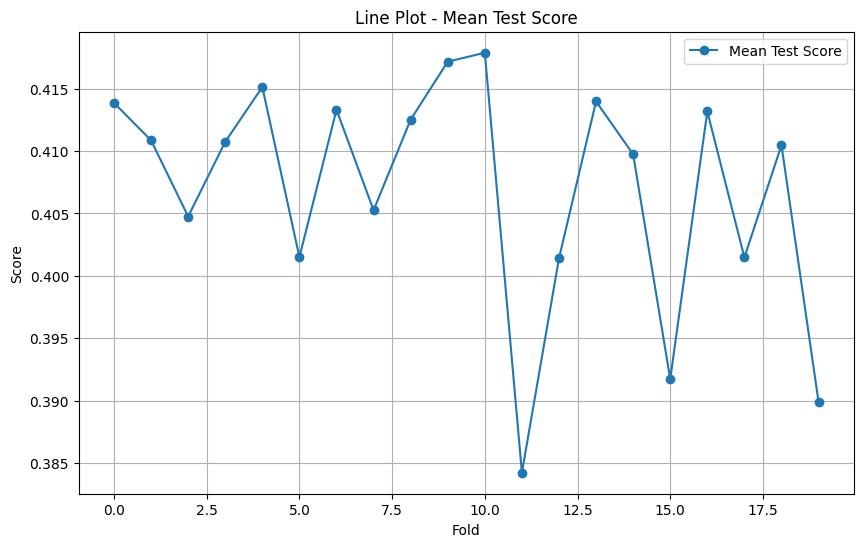

In [3]:

# 2. Criar box plots
# Box plot para mean_train_score
plt.figure(figsize=(8, 6))
plt.boxplot(df['mean_train_score'])
plt.title('Box Plot - Mean Train Score')
plt.ylabel('Score')
plt.grid(True)
plt.show()

# Box plot para mean_test_score
plt.figure(figsize=(8, 6))
plt.boxplot(df['mean_test_score'])
plt.title('Box Plot - Mean Test Score')
plt.ylabel('Score')
plt.grid(True)
plt.show()

# 3. Criar gráficos de linha
# Gráfico de linha para mean_train_score
plt.figure(figsize=(10, 6))
plt.plot(df['mean_train_score'], label='Mean Train Score', marker='o')
plt.title('Line Plot - Mean Train Score')
plt.xlabel('Fold')
plt.ylabel('Score')
plt.grid(True)
plt.legend()
plt.show()

# Gráfico de linha para mean_test_score
plt.figure(figsize=(10, 6))
plt.plot(df['mean_test_score'], label='Mean Test Score', marker='o')
plt.title('Line Plot - Mean Test Score')
plt.xlabel('Fold')
plt.ylabel('Score')
plt.grid(True)
plt.legend()
plt.show()


Estatísticas dos Modelos (Média e Desvio Padrão dos Scores):
------------------------------------------------------------
Decision Tree:
  Mean Train F1-Score: 0.4691 (± 0.0958)
  Mean Test F1-Score:  0.3853 (± 0.0155)
------------------------------------------------------------
Random Forest:
  Mean Train F1-Score: 0.6247 (± 0.2444)
  Mean Test F1-Score:  0.3737 (± 0.0244)
------------------------------------------------------------
XGBoost:
  Mean Train F1-Score: 0.5733 (± 0.1715)
  Mean Test F1-Score:  0.4070 (± 0.0094)
------------------------------------------------------------
SVM - busca_hiperparametros:
  Mean Train F1-Score: 0.2197 (± 0.0992)
  Mean Test F1-Score:  0.2156 (± 0.0981)
------------------------------------------------------------
LightGBM:
  Mean Train F1-Score: 0.4155 (± 0.0572)
  Mean Test F1-Score:  0.3863 (± 0.0387)
------------------------------------------------------------
MLP:
  Mean Train F1-Score: 0.4019 (± 0.0464)
  Mean Test F1-Score:  0.3750 (± 0.0197

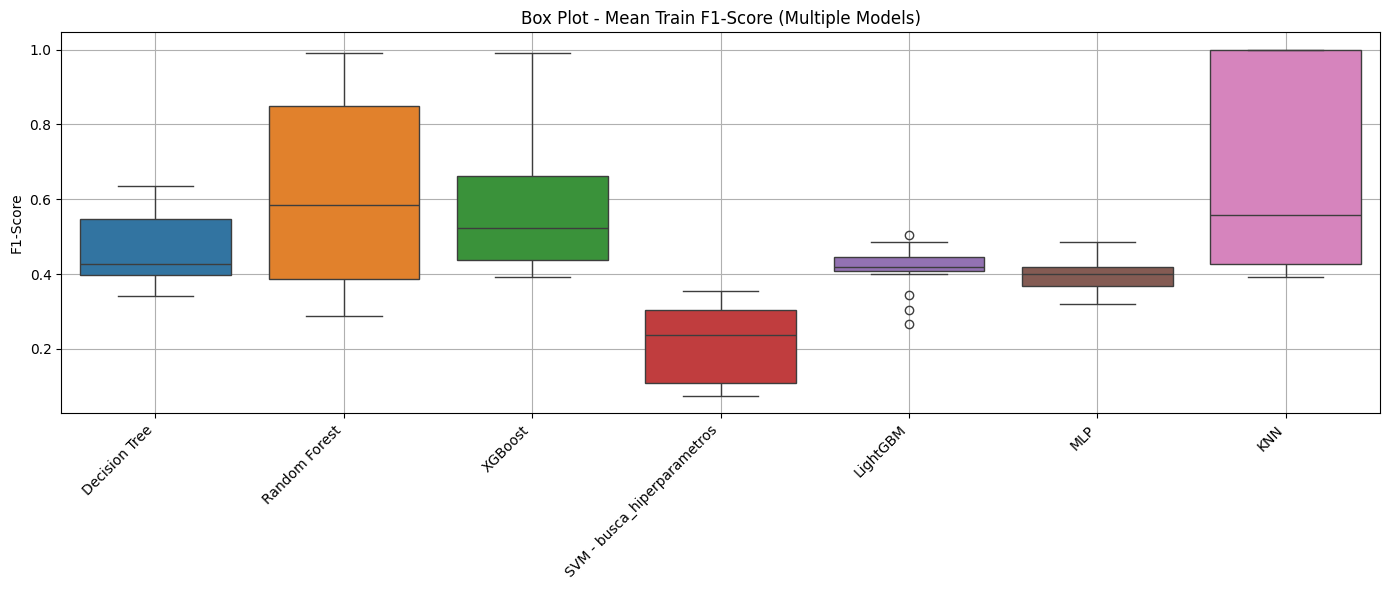

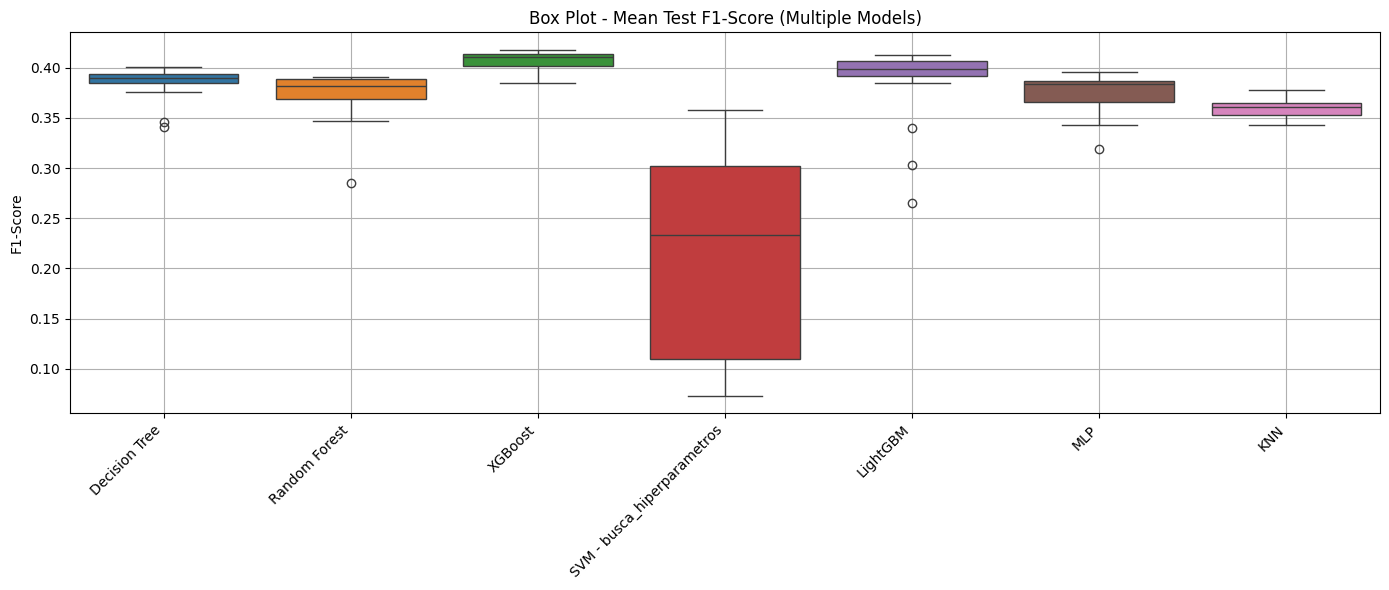

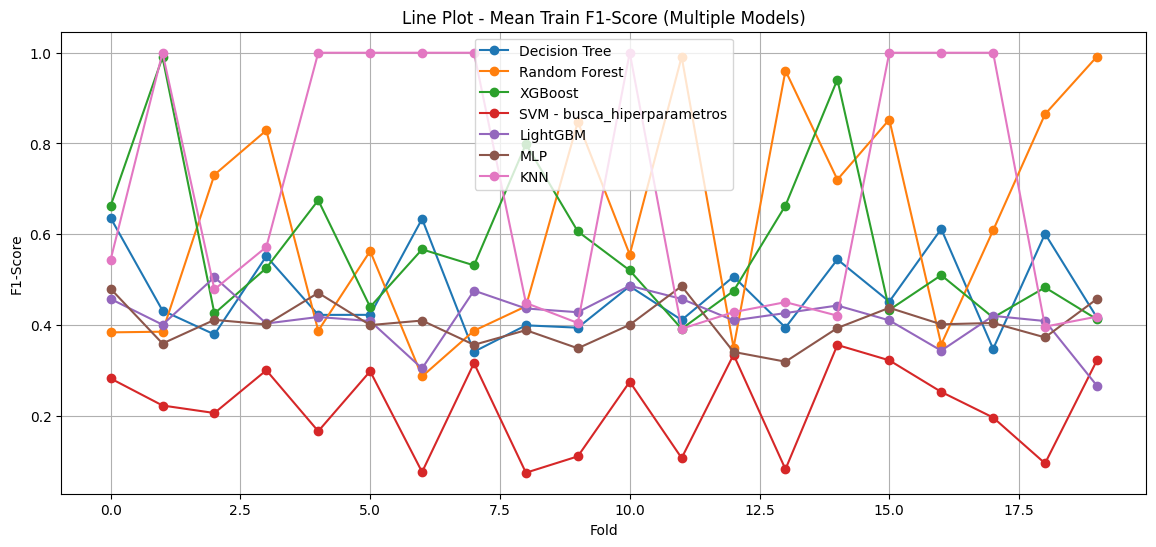

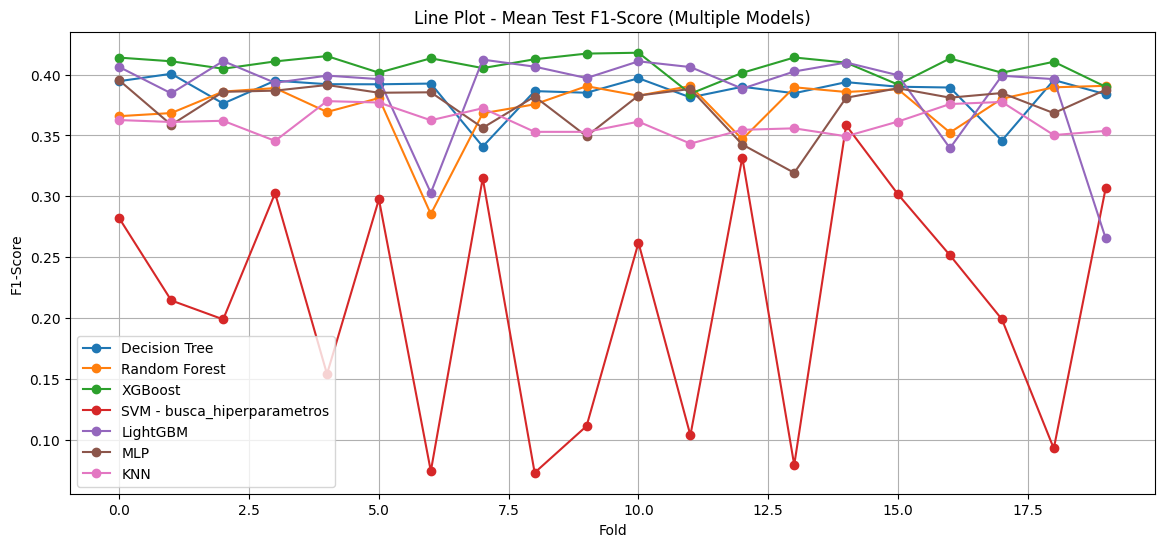

In [4]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Lista de arquivos
files = [
    'Decision Tree - busca_hiperparametros_.json',
    'Random Forest - busca_hiperparametros_.json',
    'XGBoost - busca_hiperparametros_.json',
    'SVM - busca_hiperparametros.json',
    'LightGBM - busca_hiperparametros_.json',
    'MLP - busca_hiperparametros_.json',
    'KNN - busca_hiperparametros_.json'
]

all_data = []
model_names = []

# Carregar os dados de cada arquivo
for file in files:
    with open(file, 'r') as f:
        data = json.load(f)
        # Extrair o nome do modelo do nome do arquivo (removendo " - busca_hiperparametros_" e ".json")
        model_name = file.replace(' - busca_hiperparametros_', '').replace('.json', '')
        model_names.append(model_name)
        
        # Pegar a chave raiz do JSON (assumindo que é o nome do modelo ou uma chave única)
        root_key = list(data.keys())[0]  # Pega a primeira chave do dicionário (ex.: "Decision Tree", "Random Forest", etc.)
        
        # Criar DataFrame temporário com os scores
        df_temp = pd.DataFrame({
            'mean_train_score': data[root_key]['mean_train_score'],
            'mean_test_score': data[root_key]['mean_test_score']
        })
        all_data.append(df_temp)

# Combinar todos em um único DataFrame
df_combined = pd.concat(all_data, axis=1, keys=model_names)

# Calcular e exibir média e desvio padrão para cada modelo
print("Estatísticas dos Modelos (Média e Desvio Padrão dos Scores):")
print("-" * 60)
for model in model_names:
    train_mean = df_combined[model]['mean_train_score'].mean()
    train_std = df_combined[model]['mean_train_score'].std()
    test_mean = df_combined[model]['mean_test_score'].mean()
    test_std = df_combined[model]['mean_test_score'].std()
    
    print(f"{model}:")
    print(f"  Mean Train F1-Score: {train_mean:.4f} (± {train_std:.4f})")
    print(f"  Mean Test F1-Score:  {test_mean:.4f} (± {test_std:.4f})")
    print("-" * 60)

# Box plot para mean_train_score
plt.figure(figsize=(14, 6))
sns.boxplot(data=df_combined.xs('mean_train_score', level=1, axis=1))
plt.title('Box Plot - Mean Train F1-Score (Multiple Models)')
plt.xticks(rotation=45, ha='right')
plt.ylabel('F1-Score')
plt.grid(True)
plt.tight_layout()
plt.show()

# Box plot para mean_test_score
plt.figure(figsize=(14, 6))
sns.boxplot(data=df_combined.xs('mean_test_score', level=1, axis=1))
plt.title('Box Plot - Mean Test F1-Score (Multiple Models)')
plt.xticks(rotation=45, ha='right')
plt.ylabel('F1-Score')
plt.grid(True)
plt.tight_layout()
plt.show()

# Gráficos de linha para mean_train_score
plt.figure(figsize=(14, 6))
for model in model_names:
    plt.plot(df_combined[model]['mean_train_score'], label=model, marker='o')
plt.title('Line Plot - Mean Train F1-Score (Multiple Models)')
plt.xlabel('Fold')
plt.ylabel('F1-Score')
plt.legend()
plt.grid(True)
plt.show()

# Gráficos de linha para mean_test_score
plt.figure(figsize=(14, 6))
for model in model_names:
    plt.plot(df_combined[model]['mean_test_score'], label=model, marker='o')
plt.title('Line Plot - Mean Test F1-Score (Multiple Models)')
plt.xlabel('Fold')
plt.ylabel('F1-Score')
plt.legend()
plt.grid(True)
plt.show()